# Ciclo de Negócios - PIB SP

## 1. Instalação de pacotes

In [ ]:
install.packages(c("mFilter", "BCDating", "tidyverse", "ggfortify", "gridExtra", "zoo"))

Importação dos pacotes

In [3]:
library(mFilter)
library(BCDating)
library(ggplot2)
library(ggfortify)
library(gridExtra)
library(zoo)

O pacote `zoo` é necessário para a conversão de datas de objetos `ts`.

## 2. Carregamento os dados

Dados do PIB mensal paulista da [Fundação SEADE](http://www.seade.gov.br/).

O código abaixo carrega os dados do PIB mensal no arquivo PIBSPDESMENSAL.txt e transforma num objeto `ts` do R.

In [4]:
PIBSPDESMENSAL <- read.table("PIBSPDESMENSAL.txt", header = 1)
pibspdes.ts <- ts(PIBSPDESMENSAL[,1], start = c(2002, 1), freq = 12)
pibspdes.ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2002,73.33478,73.06779,73.64706,71.76099,70.93057,70.97745,69.59280,69.97219,71.06672,71.05543,68.92039,70.46595
2003,70.25221,69.91517,70.06311,70.19920,70.42013,70.38047,71.24865,71.89990,73.40967,72.77346,72.00712,72.95622
2004,72.99799,74.67012,74.62521,74.61258,75.67317,75.66943,75.87418,76.60303,75.89974,76.03392,77.05789,76.92885
2005,77.58925,77.85808,77.65135,78.17482,78.46795,78.62313,78.94936,78.86570,78.64828,80.32922,80.18617,80.88479
2006,80.74956,80.28435,80.90182,81.09761,80.63397,81.48458,81.74595,81.56003,82.69094,83.25254,83.89853,84.22039
2007,84.80598,83.96821,86.27099,87.28801,87.49391,87.84886,89.03589,89.68530,90.02649,89.50613,90.84226,90.72636
2008,88.66001,92.33906,92.11330,93.19064,94.07928,95.24395,94.17783,96.54803,94.11640,93.53354,88.83879,88.33278
2009,90.14950,88.96092,91.34150,91.45888,92.15164,93.11597,93.56399,94.96909,96.08541,97.84143,96.93722,99.22027
2010,98.66773,99.52808,99.44595,98.74035,100.17127,98.90729,101.86711,100.11137,100.89978,101.18079,101.65303,102.72070
2011,103.69311,103.49000,101.83190,104.99832,103.64968,105.39131,103.80004,104.68971,103.27766,104.76684,104.62375,103.97065


## 3. Aplicação da função de datação de ciclos de negócios

Para obter a datação de ciclo de negócios é aplicada a função `BBQ`. A função `BBQ`, do pacote `BCDating` recebe o objeto de série temporal com valores transformados em logaritmo e multiplicado por 100, retornando um objeto com as datas de início e fim dos ciclos. O objeto retornado é atribuído à variável `dc`.

Para plotar os dados com o `ggplot2` é conveniente que estejam no formato de dataframe. Por isso constrói-se um dataframe atribuindo-o à variável `business.cycle`.

In [5]:
dc <- BBQ(
    log(pibspdes.ts)*100,
    name="Dating Business Cycles of LOG PIBSP DESSAZONALIZADO")

a <- c(as.Date(dc@y)[1], as.Date(dc@y)[dc@peaks])
b <- as.Date(dc@y)[dc@troughs]
business.cycle <- data.frame(Topo=a, Vale=b)
business.cycle

Topo,Vale
<date>,<date>
2002-01-01,2002-11-01
2003-09-01,2003-11-01
2004-02-01,2004-04-01
2005-07-01,2005-09-01
2005-12-01,2006-02-01
2007-11-01,2008-01-01
2008-08-01,2008-12-01
2010-02-01,2010-04-01
2011-01-01,2011-03-01


## 4. Aplicação o Filtro HP

Para obter os componentes `Trend` e `Cycle` do PIB paulista utiliza-se a função `hpfilter`, que recebe como argumento a série temporal do PIB.

Semelhante ao caso anterior, é conveniente que os dados estejam na forma de dataframe, nesse caso atribuído à variável `pibspdes.ts`.

In [6]:
pibsphp <- hpfilter(pibspdes.ts, freq = 14400, type = c("lambda"), drift = FALSE)
a <- cbind(pibsphp$x, pibsphp$trend, pibsphp$cycle)
pibspdes.ts <- data.frame(as.matrix(a), as.Date(as.yearmon(time(a))))
colnames(pibspdes.ts) <- c("PIB", "Trend", "Cycle", "Date")
pibspdes.ts

PIB,Trend,Cycle,Date
<dbl>,<dbl>,<dbl>,<date>
73.33478,70.05551,3.27926554,2002-01-01
73.06779,70.15481,2.91297373,2002-02-01
73.64706,70.25435,3.39270943,2002-03-01
71.76099,70.35454,1.40645848,2002-04-01
70.93057,70.45605,0.47451734,2002-05-01
70.97745,70.55965,0.41780225,2002-06-01
69.59280,70.66613,-1.07333531,2002-07-01
69.97219,70.77632,-0.80413185,2002-08-01
71.06672,70.89097,0.17574440,2002-09-01


## 5. Plotando os dados

Para plotar os dados utiliza-se o pacote `ggplot2`. Abaixo são salvas algumas variáveis que serão usadas nas configurações dos gráficos.

In [13]:
plot.limits <- as.Date(c("2010-12-31", "2019-03-02"))
plot.date_breaks <- "3 month"
plot.date_minor_breaks <- "1 month"
xscale.date.size <- 6

Para plotar o gráfico usa-se a função `ggplot` com a série temporal `pibspdes.ts` e a coluna `Date` como o eixo `x`.

Para que os dados apareçam no gráfico adiciona-se (+) à saída da função `ggplot` os chamados 'geomas', dizendo como devem ser apresentados os dados.

Warning message:
"Removed 108 rows containing missing values (geom_path)."Warning message:
"Removed 108 rows containing missing values (geom_path)."Warning message:
"Removed 8 rows containing missing values (geom_rect)."

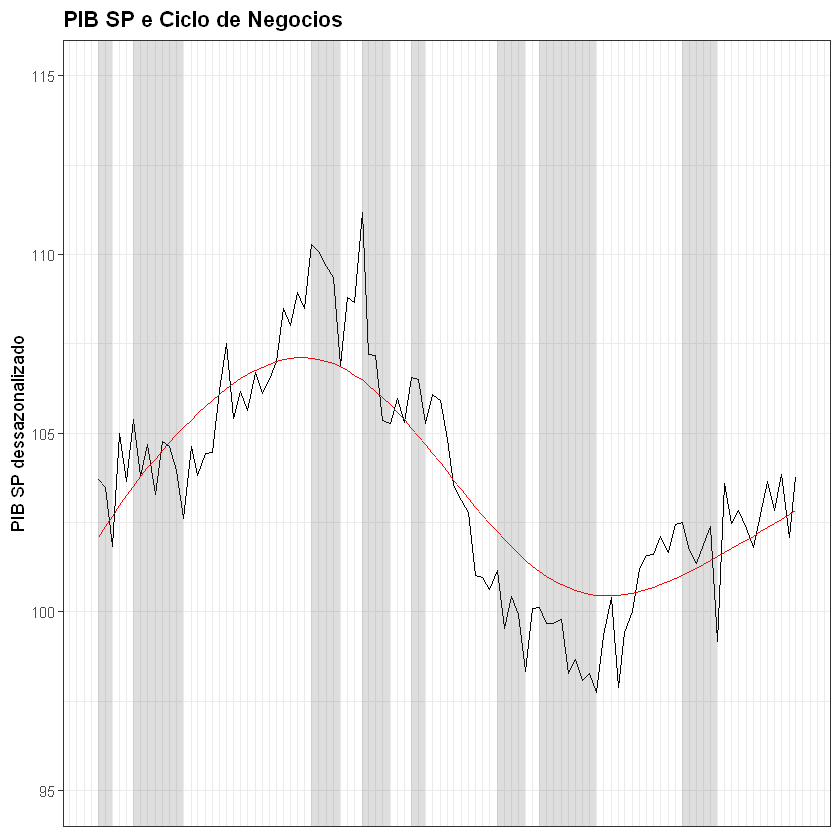

In [15]:
g1 <- ggplot(pibspdes.ts, aes(x = Date)) +
    geom_line(aes(y = PIB), color = "black") +
    geom_line(aes(y = Trend), color = "red") + 
    ylim(95, 115) +
    geom_rect(
        data = business.cycle,
        inherit.aes = FALSE,
        aes(xmin = Topo, xmax = Vale, ymin = -Inf, ymax = Inf),
        alpha = 0.2) +
    theme_bw() +
    scale_x_date(
        date_labels = "%Y-%m",
        date_breaks = plot.date_breaks,
        date_minor_breaks = plot.date_minor_breaks,
        limits = plot.limits) +
    ylab("PIB SP dessazonalizado") +
    ggtitle("PIB SP e Ciclo de Negocios") +
    theme(
        axis.title.x = element_blank(),
        axis.text.x = element_blank(),
        axis.ticks.x = element_blank(),
        plot.title = element_text(lineheight = .8, face = "bold"))
g1

Warning message:
"Removed 108 rows containing missing values (position_stack)."Warning message:
"Removed 2 rows containing missing values (geom_col)."Warning message:
"Removed 8 rows containing missing values (geom_rect)."

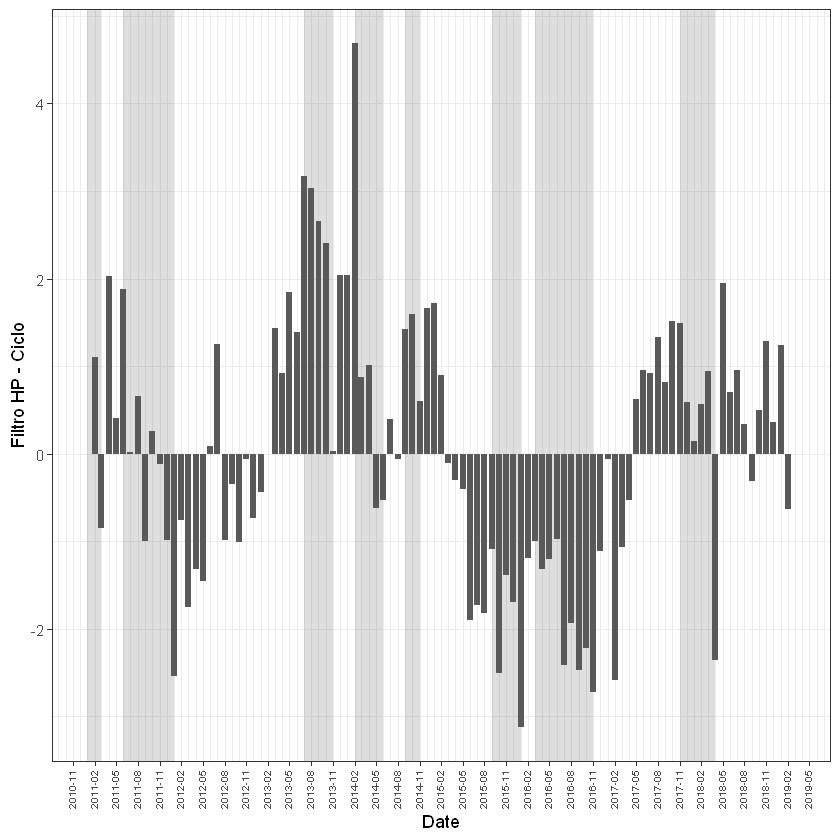

In [19]:
g2 <- ggplot(pibspdes.ts, aes(x = Date, y = Cycle)) +
    geom_col() +
    geom_rect(
        data = business.cycle,
        inherit.aes=FALSE,
        aes(xmin = Topo, xmax = Vale, ymin = -Inf, ymax = Inf),
        alpha = 0.2) +
    theme_bw() +
    scale_x_date(
        date_labels = "%Y-%m",
        date_breaks = plot.date_breaks,
        date_minor_breaks = plot.date_minor_breaks,
        limits = plot.limits) +
    ylab("Filtro HP - Ciclo") +
    theme(
        axis.text.x = element_text(
            angle = 90, 
            vjust = 0.25, 
            size = xscale.date.size))
g2

Para que os gráficos fiquem numa única figura usa-se a função `grid.arrange`.

Warning message:
"Removed 108 rows containing missing values (geom_path)."Warning message:
"Removed 108 rows containing missing values (geom_path)."Warning message:
"Removed 8 rows containing missing values (geom_rect)."Warning message:
"Removed 108 rows containing missing values (position_stack)."Warning message:
"Removed 2 rows containing missing values (geom_col)."Warning message:
"Removed 8 rows containing missing values (geom_rect)."

TableGrob (2 x 1) "arrange": 2 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (2-2,1-1) arrange gtable[layout]

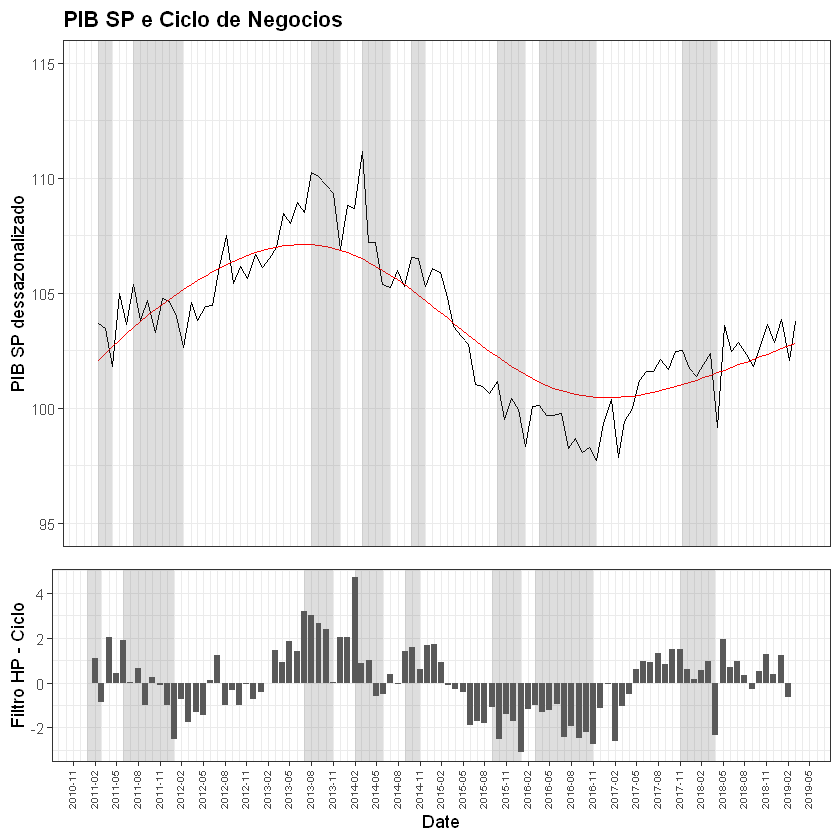

In [20]:
g <- grid.arrange(g1, g2, ncol = 1, heights = c(2, 1))
g

In [ ]:
ggsave(file = "plot.png", plot = g, width = 18, height = 9, dpi = 300)